In [1]:
%pylab inline
import DB; db = DB.database()
import Tools.ext as Te
import Tools.display as Td
import Tools.matrices as Tm
import Tools.functions as Tf
from ipywidgets import *
Td.printOptions()

Populating the interactive namespace from numpy and matplotlib
267.99 GB for 46318 items


# Fichiers

In [2]:
tmp = Te.data2array('/home/golos/Main/Connectomes/Jonathan/512/centres/p06.npy')
org, cen = tmp[:,0].astype(int)-1, tmp[:,1:]
rlgro = Te.data2array('/home/golos/Main/Connectomes/Jonathan/linkOrder_RLgro_(inv_orgLR).npy')

In [3]:
DOW = Te.data2array('../../../Connectomes/Jonathan/down_REMAKE_hemihemi.npy')
CEN = Te.data2array('../../../Connectomes/Jonathan/centres_REMAKE_p06_hemihemi.npy')
AVG = Te.data2array('../../../Connectomes/Jonathan/avg_REMAKE_hemihemi.npy')
LBL = Te.data2array('../../../Connectomes/Jonathan/LBL_REMAKE_hemihemi.npy')
LBL512 = Te.data2array('../../../Connectomes/Jonathan/LBL512_REMAKE_hemihemi.npy')
allLines = Tm.triToMat(512)

In [4]:
LR = Te.data2array('/home/golos/Main/Connectomes/Jonathan/AAL_LR_order_epurated.npy')

In [5]:
colors = Te.data2array('/home/golos/Main/Connectomes/Jonathan/COLORS.npy')
colors512 = Te.data2array('/home/golos/Main/Connectomes/Jonathan/COLORS512.npy')

# Ordre et autres

In [6]:
AAL = Te.data2array('/home/golos/Main/Notebooks/Etudes/Maxime/ORGA/main/AAL_full.npy', dic=1)
AALMatches = Te.data2array('/home/golos/Main/Notebooks/Etudes/Maxime/ORGA/origin/parcAALmatches.mat')['AALFinalIndex'][:,0] - 1

In [7]:
AALv = []
for k in sorted(AAL.keys()):
    AALv.append(AAL[k])
AALv = array(AALv)

In [11]:
aalf = AALv[AALMatches]

In [21]:
LBL512F = []
for i in range(len(LBL512)):
    if LBL512[i] != '':
        LBL512F.append(LBL512[i])
    else:
        LBL512F.append(LBL512F[-1])
LBL512F = array(LBL512F)
Te.array2data(LBL512F, '/home/golos/Main/Connectomes/Jonathan/LBL512_allnames.npy')

In [19]:
L,R = [],[]
for i,n in enumerate(aalf[org]):
    if n[-1] == 'L':
        L.append(i)
    else:
        R.append(i)
LR = array(L+R)

In [14]:
Te.array2data(LR, '/home/golos/Main/Connectomes/Jonathan/AAL_LR_order_epurated.npy')

In [ ]:
aalf[org][LR] == LBL512F

In [22]:
gro = zeros(len(org))
gro[org] = arange(len((org)))
gro = gro.astype(int)
Te.array2data(gro, '/home/golos/Main/Connectomes/Jonathan/linkOrder_gro_(inv_org).npy')

In [366]:
RL = zeros(512)
RL[LR] = arange(512)
RL = RL.astype(int)

In [420]:
Te.array2data(RL, '/home/golos/Main/Connectomes/Jonathan/linkOrder_RL_(invLR).npy')
Te.array2data(RL[gro], '/home/golos/Main/Connectomes/Jonathan/linkOrder_RLgro_(inv_orgLR).npy')

In [348]:
AG = []
last = ''
for n in aalf[org]:
    if n != last:
        AG.append(n)
        last = n
    else:
        AG.append('')
AG = array(AG)

In [506]:
colors = 13*['royalblue']+4*['blueviolet']+3*['grey']+6*['indianred']+['sage']+7*['goldenrod']+3*['grey']+6*['sage']
colors += colors

In [517]:
colors512 = []
for i,n in enumerate(AVG):
    for _ in range(n):
        colors512.append( colors[i] )

In [533]:
Te.array2data(colors, '/home/golos/Main/Connectomes/Jonathan/COLORS.npy')

In [534]:
Te.array2data(colors512, '/home/golos/Main/Connectomes/Jonathan/COLORS512.npy')

# Visualisation

In [7]:
clus = Te.data2array('/home/golos/Main/TimeCourses/Jonathan/512/sCFTL/NclusATN.npy')
seuil = 0.3
iclus = [where(clus[k] / clus[k].max() > seuil)[0] for k in range(len(clus))]
print [len(iclus[k]) for k in range(len(clus))]

[210, 185, 79, 98, 116, 75, 82, 113]


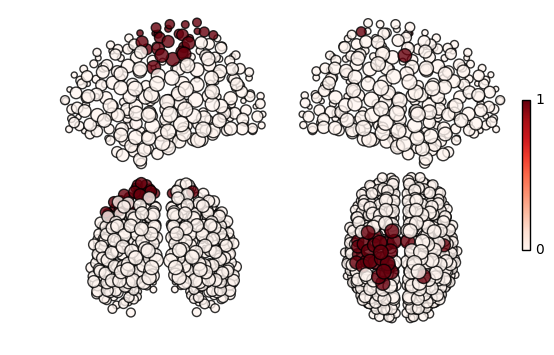

In [274]:
nodes_widget = IntSlider(description='Cluster:', min=0, max=len(iclus)-1, continuous_update=False)
def show(i):
    tmp = zeros(512)
    for i in iclus[i]:
        tmp[i] = 1
    Td.linesFromCenters(tmp[org][LR], cen[LR], lign=0, intext=0, cbar=1, cmap='Reds', alpha=0.8, disp=True)
interact(show, i=nodes_widget);

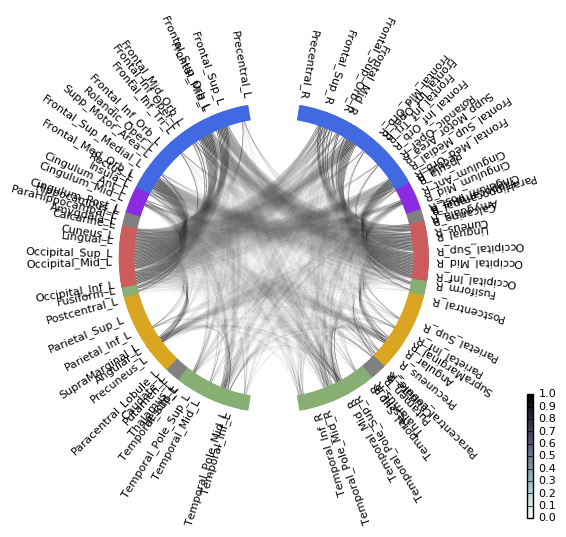

In [532]:
f = lambda i: rlgro[iclus[i]]
Td.circular(allLines[:, Tm.triIndices(512, f(3), f(6))], 
            node_colors=colors512, node_names=LBL512, disp=False, nwidth=1, node_linewidth=.1, linewidth=0.01)

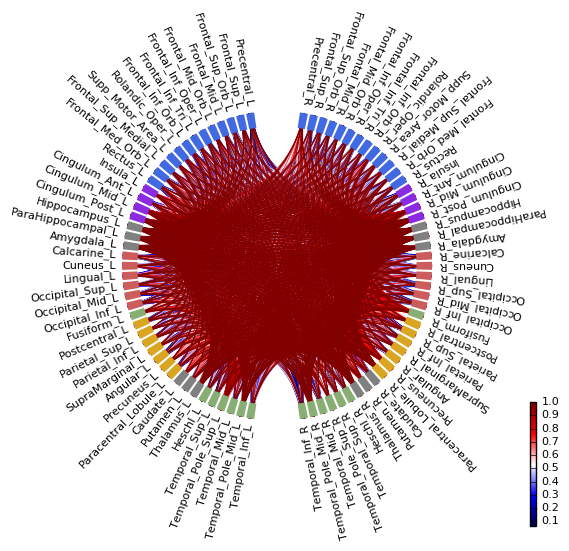

In [25]:
f = lambda i: rlgro[iclus[i]]
Td.circular(allLines[:, Tm.triIndices(512, f(0), )], cmap='seismic', falpha=0.3,# ocean_r seismic
            node_colors=colors, node_names=LBL, down=DOW, avg=AVG, cbar=1, disp=False, nwidth=3, node_linewidth=.1, linewidth=.5)

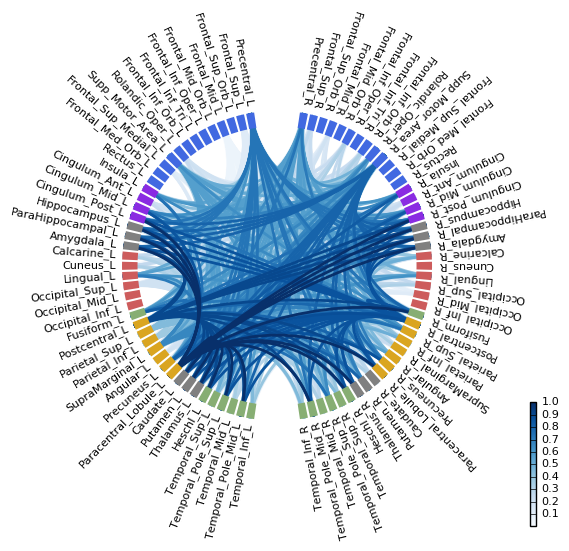

In [28]:
f = lambda i: rlgro[iclus[i]]
Td.circular(allLines[:, Tm.triIndices(512, f(0), f(5))], cmap='Blues', falpha=0.3,# ocean_r seismic
            node_colors=colors, node_names=LBL, down=DOW, avg=AVG, cbar=1, disp=False, nwidth=3, node_linewidth=.1, linewidth=2)

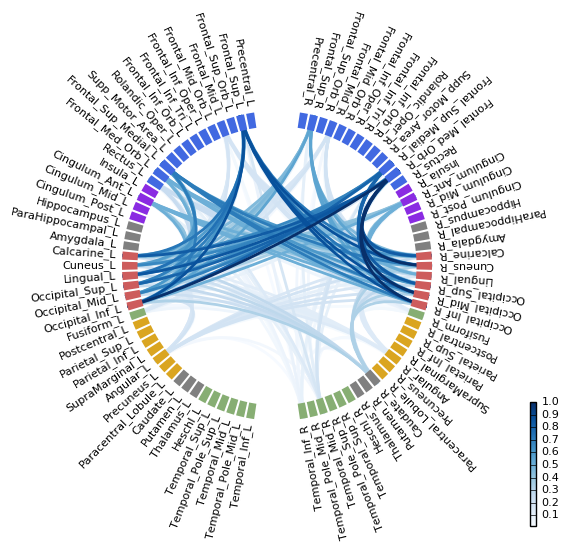

In [13]:
f = lambda i: rlgro[iclus[i]]
Td.circular(allLines[:, Tm.triIndices(512, f(3), f(6))], cmap='Blues', # ocean_r seismic afmhot
            node_colors=colors, node_names=LBL, down=DOW, avg=AVG, cbar=1, disp=False, nwidth=3, node_linewidth=.1, linewidth=2)

In [ ]:
ICLUSC = {}
for k in range(len(iclus)):
    for l in range(k+1, len(iclus)):
        ICLUSC['%s_%s'%(k,l)] = Tm.triIndices(512, gro[iclus[k]], gro[iclus[l]])

In [ ]:
Td.htmlTable(figs, ind=0, fmt="%s") 